# Part 1 - Face detection from training images

---



## Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis. Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and multimedia experts who need to detect faces from screen shots from the movie scene

## Select TensorFlow version 2.x 

In [1]:

import tensorflow
tensorflow.__version__

'2.4.1'

In [2]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

As we are using google colab, we need to mount the google drive to load the data file

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
os.getcwd()

'/Users/renukadevi/Downloads/CV module 2/Part 1'

Add path to the folder where your dataset files are

In [6]:
project_path = 'Users/renukadevi/Downloads/CV module 2/Part 1'

Let's load the dataset now

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Dropout

In [299]:
image_array = np.load('Part 1- Train data - images.npy', allow_pickle = 'True')

In [300]:
image_array.shape

(409, 2)

In [301]:

pd.DataFrame(np.load('Part 1- Train data - images.npy', allow_pickle = 'True')).to_csv("data.csv")

In [303]:
image_array[1][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527},
   {'x': 0.7692307692307693, 'y': 0.36182902584493043}],
  'imageWidth': 1280,
  'imageHeight': 697}]

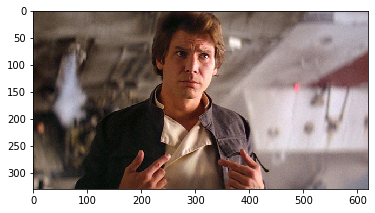

In [304]:
plt.imshow(image_array[225][0])

In [305]:
image_array[224][0].shape

(1333, 2000, 3)

In [395]:
image_array[224][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.27193932827735645, 'y': 0.23414634146341465},
   {'x': 0.35969664138678226, 'y': 0.44552845528455287}],
  'imageWidth': 2000,
  'imageHeight': 1333}]

In [307]:
for i in range(0,409):
    a=[]
    b=[]
    list=[]
    a = image_array[i][1]
    b=a.pop()
    list = [(k, v) for k, v in b.items()]
    c=list[2]
    z=np.array(c)
    x1y1[i]=z[1].pop()
    x0y0[i]=z[1].pop()

In [372]:
x1y1

{'x': 0.850609756097561,
 'y': 0.6267748478701826,
 0: {'x': 0.6584615384615384, 'y': 0.46846846846846846},
 1: {'x': 0.7692307692307693, 'y': 0.36182902584493043},
 2: {'x': 0.7456521739130435, 'y': 0.30833333333333335},
 3: {'x': 0.595, 'y': 0.46048109965635736},
 4: {'x': 0.7362068965517241, 'y': 0.6104294478527608},
 5: {'x': 0.542, 'y': 0.794},
 6: {'x': 0.8012618296529969, 'y': 0.40336134453781514},
 7: {'x': 0.565, 'y': 0.4622222222222222},
 8: {'x': 0.8608, 'y': 0.8489278752436648},
 9: {'x': 0.9293478260869565, 'y': 0.38321167883211676},
 10: {'x': 0.7716666666666666, 'y': 0.6795252225519288},
 11: {'x': 0.9429012345679012, 'y': 0.3177083333333333},
 12: {'x': 0.9176854115729421, 'y': 0.42142857142857143},
 13: {'x': 0.7356446370530878, 'y': 0.3664302600472813},
 14: {'x': 0.6226568867155664, 'y': 0.4563279857397504},
 15: {'x': 0.7906666666666666, 'y': 0.368},
 16: {'x': 0.7367280606717227, 'y': 0.3408360128617363},
 17: {'x': 0.3640303358613218, 'y': 0.24277456647398843},
 1